In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

first_df = pd.read_csv('First_Day_Dataset.csv')

In [2]:
pct_df = first_df

In [3]:
pct_df['S&P'] = pct_df.loc[:,'^GSPC'].pct_change()
pct_df['EurAsia'] = pct_df.loc[:,'EFA'].pct_change()
pct_df['Real_Estate'] = pct_df.loc[:,'^FNAR'].pct_change()
pct_df['Commodity'] = pct_df.loc[:,'GD=F'].pct_change()


In [4]:
pct_df = pct_df.drop(['^GSPC', 'EFA', '^FNAR', 'GD=F'] , axis=1)

In [5]:
pct_df = pct_df.dropna()


In [6]:
pct_df = pct_df.drop(['Unnamed: 0'] , axis=1)
pct_df

,S&P,EurAsia,Real_Estate,Commodity
1,0.037762,0.043807,-0.009725,0.079894
2,0.032713,0.004522,0.038322,-0.015849
3,-0.009316,-0.028093,0.034129,-0.019524
4,-0.090894,-0.137484,-0.076239,-0.156250
5,0.068441,0.105512,0.082808,0.031008
...,...,...,...,...
85,0.057368,0.035352,0.001521,0.049428
86,0.070430,0.028296,0.013770,0.046954
87,-0.041356,-0.015834,-0.028864,-0.047209
88,-0.020871,-0.028585,-0.024425,0.008015


In [7]:
#투자비중
W = [0.24295694, 0.69729744, 0.04978756, 0.00995805]
W

[0.24295694, 0.69729744, 0.04978756, 0.00995805]

# 모멘텀 투자 전략

### 시기별 모멘텀의 비중 구하기. 

지수함수 풀기!!

In [8]:
-2/ (1-np.exp(3))

0.1047913929825119

In [9]:
def get_momentum_W(index):
    coeff = 0.1047913929825119
    
    W = (-1)*coeff*np.exp(index)+coeff+1
    
    return W


In [10]:
sum = 0
sum +=get_momentum_W(0)
sum +=get_momentum_W(1)
sum +=get_momentum_W(2)
sum +=get_momentum_W(3)
    
sum

1.150420765208883

In [11]:
momentum_W = []
momentum_W.append(get_momentum_W(0)/sum)
momentum_W.append(get_momentum_W(1)/sum)
momentum_W.append(get_momentum_W(2)/sum)
momentum_W.append(get_momentum_W(3)/sum)

agg = 0
for i in momentum_W:
    agg += i
    
agg

0.9999999999999999

In [12]:
first_df

,Unnamed: 0,^GSPC,EFA,^FNAR,GD=F,S&P,EurAsia,Real_Estate,Commodity
0,2012-02-01,1324.089966,38.426586,147.039993,660.250000,NaN,NaN,NaN,NaN
1,2012-03-01,1374.089966,40.109928,145.610001,713.000000,0.037762,0.043807,-0.009725,0.079894
2,2012-04-02,1419.040039,40.291321,151.190002,701.700012,0.032713,0.004522,0.038322,-0.015849
3,2012-05-01,1405.819946,39.159424,156.350006,688.000000,-0.009316,-0.028093,0.034129,-0.019524
4,2012-06-01,1278.040039,33.775635,144.429993,580.500000,-0.090894,-0.137484,-0.076239,-0.156250
...,...,...,...,...,...,...,...,...,...
85,2020-08-03,3294.610107,59.312443,197.529999,343.950012,0.057368,0.035352,0.001521,0.049428
86,2020-09-01,3526.649902,60.990746,200.250000,360.100006,0.070430,0.028296,0.013770,0.046954
87,2020-10-01,3380.800049,60.025017,194.470001,343.100006,-0.041356,-0.015834,-0.028864,-0.047209
88,2020-11-02,3310.239990,58.309212,189.720001,345.850006,-0.020871,-0.028585,-0.024425,0.008015


In [13]:
def combined_momentum_calculator(ticker):
    
    momentum_list = []
    
    for i in range(4,len(first_df)):
        one_mos_Momentum = (1-first_df[ticker].iloc[i]/first_df[ticker].iloc[i-1]) * momentum_W[0]
        two_mos_Momentum = (1-first_df[ticker].iloc[i]/first_df[ticker].iloc[i-2]) * momentum_W[1]
        three_mos_Momentum = (1-first_df[ticker].iloc[i]/first_df[ticker].iloc[i-3]) * momentum_W[2]
        four_mos_Momentum = (1-first_df[ticker].iloc[i]/first_df[ticker].iloc[i-4]) * momentum_W[3]
        
        agg_Momentum = 0    
        agg_Momentum += one_mos_Momentum
        agg_Momentum += two_mos_Momentum
        agg_Momentum += three_mos_Momentum
        agg_Momentum += four_mos_Momentum
    
        momentum_list.append(agg_Momentum)
        
    return momentum_list    

In [14]:
sp_momentum = combined_momentum_calculator('^GSPC')
EurAsia_momentum = combined_momentum_calculator('EFA')
RealEst_momentum = combined_momentum_calculator('^FNAR')
Comm_momentum = combined_momentum_calculator('GD=F')

In [15]:
All_Momentum = pd.DataFrame(
    {"SP": sp_momentum,
    "EurAsia": EurAsia_momentum,
    "RealEst": RealEst_momentum,
    "Commod": Comm_momentum})

In [16]:
All_Momentum

,SP,EurAsia,RealEst,Commod
0,0.139677,0.174924,0.085037,0.207315
1,-0.033646,-0.097585,-0.017690,-0.031579
2,-0.081044,-0.119269,-0.042688,-0.179493
3,-0.098445,-0.142735,-0.001380,-0.194988
4,0.071737,0.071682,0.073250,0.101044
...,...,...,...,...
81,0.137301,0.108568,0.164210,0.109097
82,0.014250,0.072776,0.066024,0.219360
83,0.085348,0.047912,0.044960,0.133302
84,0.114742,0.076549,0.036970,0.067655


In [17]:
DF_Momen = []

In [18]:
# 투자 원금
Total = 1000000
first_port = []

sp500_start = W[0]*Total
EFA_start = W[1]*Total
RealEstate_start = W[2]*Total
Commodity_start = W[3]*Total
total_price = sp500_start+EFA_start+RealEstate_start+Commodity_start


first_port.append(sp500_start)
first_port.append(EFA_start)
first_port.append(RealEstate_start)
first_port.append(Commodity_start)
first_port.append(total_price)


DF_Momen.append(first_port)
DF_Momen

[[242956.94,
  697297.4400000001,
  49787.560000000005,
  9958.05,
  999999.9900000002]]

In [19]:
for i in range(4,len(pct_df)):
    current_sp = DF_Momen[i-4][0]* (1+ (pct_df['S&P'].iloc[i]))
    current_EurAsia = DF_Momen[i-4][1]* (1+ (pct_df['EurAsia'].iloc[i]))
    current_Real_Estate = DF_Momen[i-4][2]* (1+ (pct_df['Real_Estate'].iloc[i]))
    current_Commodity = DF_Momen[i-4][3]* (1+ (pct_df['Commodity'].iloc[i]))
    
    weight = [0,0,0,0]
    
    weight[0] = All_Momentum.iloc[i-4][0] - All_Momentum.iloc[i-4].mean() 
    weight[1] = All_Momentum.iloc[i-4][1] - All_Momentum.iloc[i-4].mean()
    weight[2] = All_Momentum.iloc[i-4][2] - All_Momentum.iloc[i-4].mean()
    weight[3] = All_Momentum.iloc[i-4][3] - All_Momentum.iloc[i-4].mean()
        
    current_total_price = current_sp + current_EurAsia + current_Real_Estate + current_Commodity
    
    rebalance_SP=  current_total_price*weight[0]
    rebalance_EurAsia= current_total_price*weight[1]
    rebalance_RealEstate= current_total_price*weight[2]
    rebalance_Commodity= current_total_price*weight[3]
    
    rebalance_portfolio = []
    rebalance_portfolio.append(rebalance_SP)
    rebalance_portfolio.append(rebalance_EurAsia)
    rebalance_portfolio.append(rebalance_RealEstate)
    rebalance_portfolio.append(rebalance_Commodity)
    rebalance_portfolio.append(current_total_price)
    
    
    DF_Momen.append(rebalance_portfolio)
                                   
DF_Momen                                   

[[242956.94,
  697297.4400000001,
  49787.560000000005,
  9958.05,
  999999.9900000002],
 [-13202.594862300657,
  25379.48950319756,
  -73013.4602499279,
  60836.565609031015,
  1094633.0095502825],
 [28.307932303954594,
  -129.37269747327716,
  67.65766253864537,
  33.4071026306772,
  2466.113788595925],
 [-0.17998717166141145,
  0.09992186944301787,
  -0.46085666617560017,
  0.5409219683939938,
  -7.322664551588218],
 [-0.00026505068574172633,
  0.0008077803533709585,
  -0.002616226792440043,
  0.0020734971248108115,
  -0.02422271607545734],
 [-6.013907128255806e-07,
  -6.056744587813967e-07,
  -4.830896867823527e-07,
  1.690154858389331e-06,
  7.819034487052982e-05],
 [-7.547872861671726e-10,
  9.698822362744836e-10,
  1.609411807195966e-09,
  -1.8245067573032768e-09,
  -5.3018194295144496e-08],
 [7.210604348946282e-13,
  2.1572685122075683e-12,
  -3.7170564288577845e-12,
  8.387274817555881e-13,
  8.404753842356098e-11],
 [6.1882543267575525e-15,
  -5.434124334496836e-15,
  2.46120

In [20]:
len(DF_Momen)  

86

In [22]:
df_momm = pd.DataFrame(
      DF_Momen,
      columns=['sp', 'EurAsia', 'Real_Estate', 'Commodity','Total_Price'])
df_momm

,sp,EurAsia,Real_Estate,Commodity,Total_Price
0,2.429569e+05,6.972974e+05,4.978756e+04,9.958050e+03,1.000000e+06
1,-1.320259e+04,2.537949e+04,-7.301346e+04,6.083657e+04,1.094633e+06
2,2.830793e+01,-1.293727e+02,6.765766e+01,3.340710e+01,2.466114e+03
3,-1.799872e-01,9.992187e-02,-4.608567e-01,5.409220e-01,-7.322665e+00
4,-2.650507e-04,8.077804e-04,-2.616227e-03,2.073497e-03,-2.422272e-02
...,...,...,...,...,...
81,3.045400e-229,2.537018e-229,-3.569762e-231,-5.546720e-229,2.705479e-228
82,1.902374e-233,-5.378692e-233,8.721035e-233,-5.244717e-233,2.534034e-231
83,-1.865658e-237,-4.809256e-238,-6.406857e-238,2.987270e-237,2.366006e-236
84,6.890672e-241,-2.765371e-240,-3.037801e-240,5.114105e-240,9.227740e-239


## 수익률

In [23]:
Return = df_momm.loc[:,'Total_Price'].pct_change()
Return = Return.dropna()
Return

1     0.094633
2    -0.997747
3    -1.002969
4    -0.996692
5    -1.003228
        ...   
81   -1.001255
82   -0.999063
83   -0.999991
84   -0.996100
85   -1.001101
Name: Total_Price, Length: 85, dtype: float64

## Variance

In [25]:
df_1 = df_momm.loc[:,'sp'].pct_change()
df_2 = df_momm.loc[:,'EurAsia'].pct_change()
df_3 = df_momm.loc[:,'Real_Estate'].pct_change()
df_4 = df_momm.loc[:,'Commodity'].pct_change()

df_momm_return = pd.concat([df_1,df_2,df_3,df_4], axis=1)
df_momm_return = df_momm_return.dropna()
df_momm_return

,sp,EurAsia,Real_Estate,Commodity
1,-1.054341,-0.963603,-2.466500,5.109285
2,-1.002144,-1.005098,-1.000927,-0.999451
3,-1.006358,-1.000772,-1.006812,-0.983808
4,-0.998527,-0.991916,-0.994323,-0.996167
5,-0.997731,-1.000750,-0.999815,-0.999185
...,...,...,...,...
81,-1.002120,-1.002330,-0.999926,-1.001844
82,-0.999938,-1.000212,-1.024430,-0.999905
83,-1.000098,-0.999991,-1.000007,-1.000057
84,-1.000369,-0.994250,-0.995259,-0.998288


In [27]:
Variance = []

for i in range(2,len(df_momm_return)+2):
    covariance = df_momm_return.iloc[:i,:].cov()    
    
    current_Var = 0
    for i in range(4):
        for j in range(4):
            current_Var += W[i] * W[j] * covariance.iloc[i, j]
    Variance.append(current_Var)        

    
len(Variance)

85

## SharpRatio

In [29]:
sharp = []
risk_free_rate = 0.01
for i in range(1,len(Return)+1):
    sharp_each = (Return[i] - risk_free_rate)/np.sqrt(Variance[i-1])
    sharp.append(sharp_each)
    
len(sharp)

85

## MDD

In [30]:
Total_Price = df_momm.loc[:,'Total_Price']
Total_Price

0      1.000000e+06
1      1.094633e+06
2      2.466114e+03
3     -7.322665e+00
4     -2.422272e-02
          ...      
81    2.705479e-228
82    2.534034e-231
83    2.366006e-236
84    9.227740e-239
85   -1.015538e-241
Name: Total_Price, Length: 86, dtype: float64

In [31]:
MDD = []
for i in range(1,len(Total_Price)):
    minimum = min(Total_Price[:i+1])
    maximum = max(Total_Price[:i+1])
                  
    current_MDD = (minimum-maximum)/maximum
    MDD.append(current_MDD)
    
len(MDD)

85

In [32]:
Eval_Momentum = pd.DataFrame(
    {"Return": Return,
    "Variance": Variance,
    "Sharp_ratio": sharp,
    "MDD": MDD})
Eval_Momentum

,Return,Variance,Sharp_ratio,MDD
1,0.094633,0.000008,29.078364,-0.086452
2,-0.997747,0.000004,-488.868844,-0.997747
3,-1.002969,0.000021,-222.928727,-1.000007
4,-0.996692,0.000015,-255.814573,-1.000007
5,-1.003228,0.000013,-286.005442,-1.000007
...,...,...,...,...
81,-1.001255,0.002349,-20.866608,-1.000007
82,-0.999063,0.002320,-20.949372,-1.000007
83,-0.999991,0.002292,-21.094267,-1.000007
84,-0.996100,0.002265,-21.139210,-1.000007


In [34]:
print("Return의 mean: ", Eval_Momentum['Return'].mean())
print("Variance의 mean: ", Eval_Momentum['Variance'].mean())
print("Sharp_ratio의 mean: ", Eval_Momentum['Sharp_ratio'].mean())
print("MDD의 mean: ", Eval_Momentum['MDD'].mean())


Return의 mean:  -0.987259481640262
Variance의 mean:  0.002445984637256978
Sharp_ratio의 mean:  -45.662426113018
MDD의 mean:  -0.9892324017285198


<AxesSubplot: >

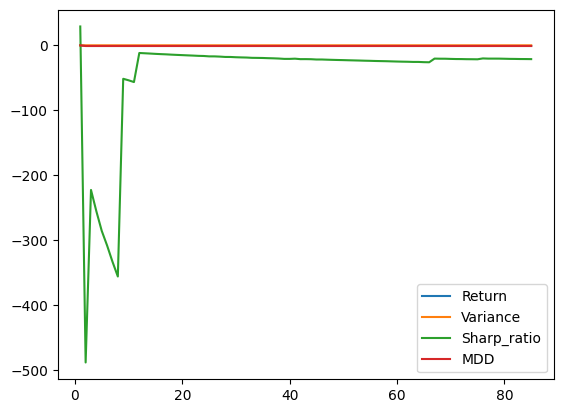

In [35]:
Eval_Momentum.plot()